In [2]:
from __future__ import print_function   # Python 2/3 compatability

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('max_rows', 6)  # max number of rows to show in this notebook — to save space!

# 05 1D analysis: `pandas`!

Let's redo the first homework problem of the `matplotlib` homework (hw04) using `pandas`. In this question, you were asked to recreate a figure, which required analysis as well:

![Merrimack River Discharge](../homework/merrimack_discharge.png)

We'll start by reading the dataset into a DataFrame, the `pandas` basic structure.

In [3]:
df = pd.read_table('../data/merrimack_discharge.dat', header=23, skiprows=[24], parse_dates=[2], index_col=2)
# convert units from ft^3/s to m^3/s
df['dv_va'] *= 0.3048**3
df

,agency_cd,site_no,dv_va,dv_cd
dv_dt,,,,
1923-06-01,USGS,1100000,135.920864,NaN
1923-06-02,USGS,1100000,98.825795,NaN
1923-06-03,USGS,1100000,81.552518,NaN
...,...,...,...,...
2004-09-28,USGS,1100000,131.673337,NaN
2004-09-29,USGS,1100000,145.265423,NaN
2004-09-30,USGS,1100000,156.308993,NaN


What do all these input keyword arguments do?

* header: tells which row of the data file is the header, from which it will extract column names
* skiprows: can skip specific rows, `skiprows=[row number list]`, or number of rows to skip, `skiprows=[number of rows integer]`.
* parse_dates: try to interpret the values in [col] as dates, to convert them into `datetime` objects.
* index_col: if no index column is given, an index counting from 0 is given to the rows. By inputting `index_col=[column integer]`, that column will be used as the index instead.

We can check to make sure the indices are being interpreted how we want with `df.index`.

In [701]:
df.index

DatetimeIndex(['1923-06-01', '1923-06-02', '1923-06-03', '1923-06-04',
               '1923-06-05', '1923-06-06', '1923-06-07', '1923-06-08',
               '1923-06-09', '1923-06-10',
               ...
               '2004-09-21', '2004-09-22', '2004-09-23', '2004-09-24',
               '2004-09-25', '2004-09-26', '2004-09-27', '2004-09-28',
               '2004-09-29', '2004-09-30'],
              dtype='datetime64[ns]', name='dv_dt', length=29708, freq=None)

From this we see that the index is indeed using the timing information in the file, and we can see that the `dtype` is `datetime`.

We can now access the file information using keyword arguments, like so:

In [588]:
df['dv_va']

dv_dt
1923-06-01    135.920864
1923-06-02     98.825795
                 ...    
2004-09-29    145.265423
2004-09-30    156.308993
Name: dv_va, dtype: float64

We can plot in this way, too:

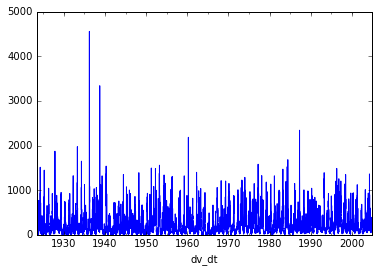

In [10]:
df['dv_va'].plot()

In [ ]:
df['dv_va'].plot

One of the biggest benefits of using `pandas` is being able to easily reference the data in intuitive ways. For example, because we set up the index of the dataframe to be the date, we can pull out data using dates. In the following, we pull out all data from 1960:

In [590]:
df['1960']

,agency_cd,site_no,dv_va,dv_cd
dv_dt,,,,
1960-01-01,USGS,1100000,208.978328,NaN
1960-01-02,USGS,1100000,181.227818,NaN
...,...,...,...,...
1960-12-30,USGS,1100000,124.594125,NaN
1960-12-31,USGS,1100000,110.435702,NaN


Here we further subdivide to examine the station numbers:

In [591]:
df['1960-01']['site_no']  # look at the site numbers

dv_dt
1960-01-01    1100000
1960-01-02    1100000
               ...   
1960-01-30    1100000
1960-01-31    1100000
Name: site_no, dtype: int64

---
###  *Exercise*

> Figure out how to access the data from dataframe `df` for 1940 through 1945. Plot the daily mean streamflow value (`dv_va`) for this time period.

---

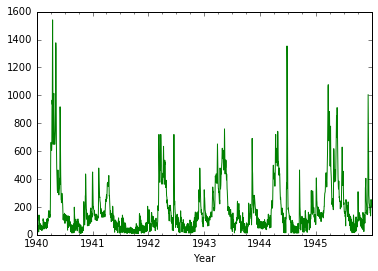

In [14]:
df['1940':'1945']['dv_va'].plot(color='g')
plt.xlabel('Year')

We can change many `plot` parameters directly from `pandas`. For example, here we start to recreate the homework plot.

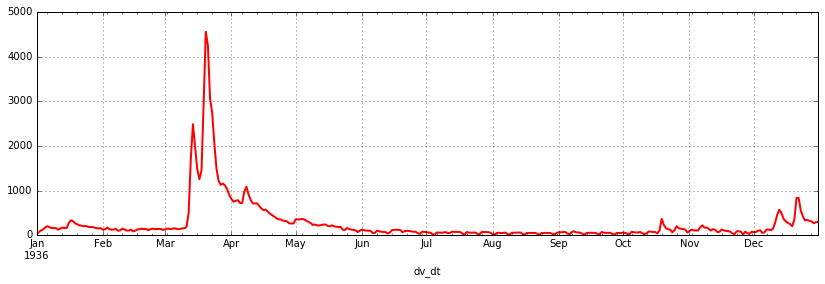

In [15]:
df['1936']['dv_va'].plot(color='r', lw=2, figsize=(14, 4), grid=True)

We can add data to our dataframe very easily. Below we add an index that gives the day in the year for each date.

We now can use the values from the key `day` to compute the daily river flow average over all of the years — one of the questions on the homework (for the grad students). We access the data in the dataframe, `groupby` the day of the year (spanning all of the years), and then compute the mean.

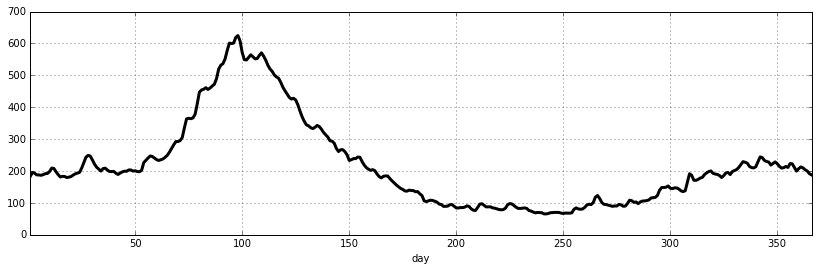

In [33]:
df.loc[:,'day'] = df.index.dayofyear  # adding a field for the day of the year
df.groupby('day').aggregate(np.mean)['dv_va'].plot(color='k', grid=True, figsize=(14, 4), lw=3)

---
###  *Exercise*

> Continue remaking the streamflow figure from the top of this page. Work to get the 4 rivers and the mean all overlaid on the same axes.

---

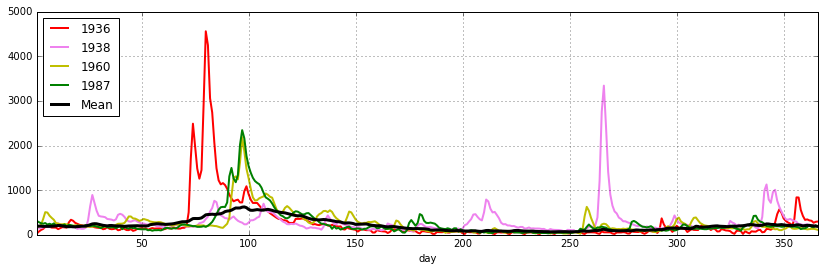

In [46]:
ax = df['1936'].plot(x='day',y='dv_va',color='r', lw=2,grid=True,figsize=(14, 4),label='1936')
df['1938'].plot(ax=ax,x='day',y='dv_va',color='violet', lw=2,grid=True,label='1938')
df['1960'].plot(ax=ax,x='day',y='dv_va',color='y', lw=2,grid=True,label='1960')
df['1987'].plot(ax=ax,x='day',y='dv_va',color='g', lw=2,grid=True,label='1987')
df.groupby('day').aggregate(np.mean)['dv_va'].plot(ax=ax,color='k',lw=3,grid=True,label='Mean')
plt.legend(loc=2)

## Reading in files

Let's revisit a dataset from hw04: carbon dioxide measurements from Mauna Loa, Hawaii. This is how we previously read in the file:

In [48]:
mauna_loa_co2 = np.genfromtxt('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
years = mauna_loa_co2[:,0]
months = mauna_loa_co2[:,1]
co2 = mauna_loa_co2[:,4]

Pretty straight-forward, but also to then plot with the data we would probably want to create some `datetime` objects.

Here we read in the data in a new way, with `pandas`. Get the CO2 data:

In [88]:
dfml = pd.read_table('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', delim_whitespace=True,
                     parse_dates=[[0,1]], index_col=[0], comment='#', header=None, names=['year', 'month', 'co2'], 
                     usecols=[0,1,4])
dfml

,co2
year_month,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
...,...
2015-12-01,401.85
2016-01-01,402.52
2016-02-01,404.02


Note that getting the input arguments just right is necessary to maximize how useful this is. For example, we really want to be able to index by the date, but we also want to be able to have the dates just work. Play around with the input arguments to see how important each one is.

* `parse_dates` is used to combine the data from the first 2 columns together for the date information, and return them as `datetime` objects;
* `index_col` uses these `datetime` objects for indexing so that we can reference data by date;
* `comment` enables us to skip the first lines of the file;
* `delim_whitespace` is necessary to properly split up the rows of data into columnsl
* `header` allows us to read in the column name information from the file, but in this file it was hard to do since it spans two lines. Instead, we input `header=None` so that it doesn't take any data line in as a header, and then we set the following...
* `names` gives the names of the columns in order, for the header;
* `usecols` reads in a subset of the columns

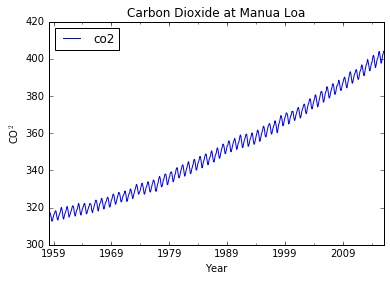

In [53]:
dfml.plot()
plt.xlabel('Year')
plt.ylabel('CO$^{2}$')
plt.title('Carbon Dioxide at Manua Loa')
plt.legend(loc=2)

## Running mean

Now let's also look at some temperature data to go with the carbon dioxide data. We see that there are two data columns that match in length the date information: `Annual_Mean` and `5-year_Mean`. We can see what these look like below in table form, then in plot form.

In [54]:
dftemp = pd.read_table('http://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt',
                       header=2, delim_whitespace=True, skiprows=[3,141], parse_dates=[0], index_col=[0],
                       na_values='*')
dftemp

,Annual_Mean,5-year_Mean
Year,,
1880-01-01 00:00:00,-0.19,NaN
1881-01-01 00:00:00,-0.10,NaN
1882-01-01 00:00:00,-0.08,-0.16
...,...,...
2013-01-01,0.65,0.70
2014-01-01,0.74,NaN
2015-01-01,0.87,NaN


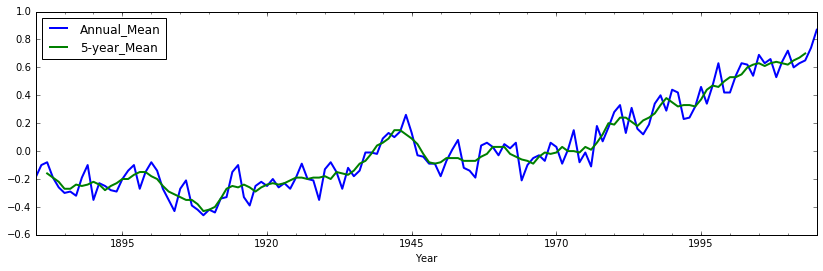

In [55]:
dftemp.plot(lw=2, figsize=(14,4))

---
###  *Exercise*

> On hw03, the graduate students wrote a function to calculate the running mean of an input array. The data we just read in includes a rolling mean. Reproduce the rolling mean given in the data using `pandas`. Start with the following and try to get your calculation of the running mean and the one from the data file to match exactly. What other keyword arguments do you need to do this? Can you get the running mean to extend all the way to the end points of the time vector (in the given data, the end points are missing values)?

---

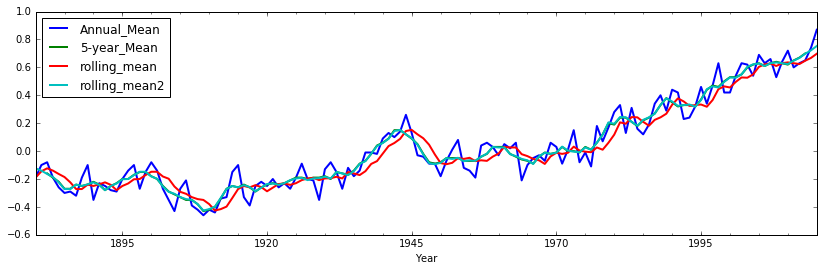

In [74]:
dftemp['rolling_mean'] = pd.rolling_mean(dftemp['Annual_Mean'], window=5, min_periods = 1)
#dftemp['rolling_mean2'] = pd.rolling_mean(dftemp['Annual_Mean'], window=5, min_periods = 1, center=True)
dftemp.plot(figsize=(14,4), lw=2)

# Resampling data

We should note here that these two data sets span different lengths of time, and the time between data points varies between the two data sets. We can still plot them together with `matplotlib`.

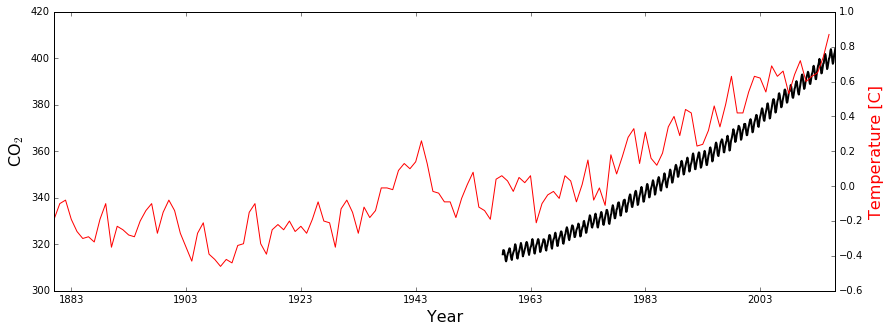

In [78]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(111)
ax1.plot(dfml.index, dfml['co2'], color='k', lw=2)
ax2 = ax1.twinx()
ax2.plot(dftemp.index, dftemp['Annual_Mean'], 'r')
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel(r'CO$_2$', fontsize=16)
ax2.set_ylabel('Temperature [C]', fontsize=16, color='r')

Let's resample to have data twice a year instead of once a year.

In [82]:
dftemphalf = dftemp['Annual_Mean'].resample('6MS')
dftemphalf

Year
1880-01-01 00:00:00   -0.19
1880-07-01 00:00:00     NaN
1881-01-01 00:00:00   -0.10
                       ... 
2014-01-01             0.74
2014-07-01              NaN
2015-01-01             0.87
Freq: 6MS, Name: Annual_Mean, dtype: float64

Pretty easy — though the new data points are filled with nan's. We can fill these in with a reasonable choice of linear interpolation by adding that function call on the end:

In [84]:
dftemphalf = dftemp['Annual_Mean'].resample('6MS').interpolate()
dftemphalf

Year
1880-01-01 00:00:00   -0.190
1880-07-01 00:00:00   -0.145
1881-01-01 00:00:00   -0.100
                       ...  
2014-01-01             0.740
2014-07-01             0.805
2015-01-01             0.870
Freq: 6MS, Name: Annual_Mean, dtype: float64

We could also resample to have data every other year instead of once a year

In [85]:
dftemptwice = dftemp['Annual_Mean'].resample('2AS', how='mean')
dftemptwice

Year
1880-01-01 00:00:00   -0.145
1882-01-01 00:00:00   -0.135
1884-01-01 00:00:00   -0.280
                       ...  
2010-01-01             0.660
2012-01-01             0.640
2014-01-01             0.805
Freq: 2AS-JAN, Name: Annual_Mean, dtype: float64

Let's compare these with the original data to make sure everything looks right:

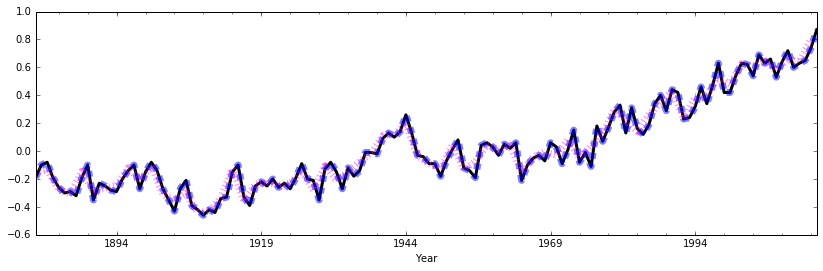

In [86]:
ax = dftemp['Annual_Mean'].plot(figsize=(14,4), lw=3, color='k')
dftemphalf.plot(ax=ax, lw=7, ls='--', color='blue', alpha=0.5)
dftemptwice.plot(ax=ax, lw=7, ls=':', color='magenta', alpha=0.5)

---
###  *Exercise*

> Say we want to plot the CO2 and temperature data together, 1-1. That is, we want to be able to make a `scatter` plot of CO2 vs. temperature. To do this, we need to have the same number of data points. Use resampling and array slicing to make a `scatter` plot of the CO2 vs. the temperature data.

---

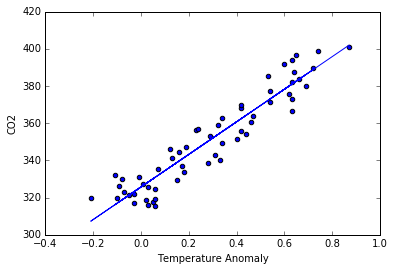

In [122]:
df_co2 = dfml.resample('AS',how='mean')

plt.scatter(dftemp['1958':]['Annual_Mean'],df_co2[:'2015'])
plt.ylabel("CO2")
plt.xlabel("Temperature Anomaly")

import scipy.stats as st
st.pearsonr(dftemp['1958':]['Annual_Mean'].values.squeeze() ,df_co2[:'2015'].values.squeeze())
S, I, R, P, E = st.linregress(dftemp['1958':]['Annual_Mean'].values.squeeze() ,df_co2[:'2015'].values.squeeze())

plt.plot(dftemp['1958':]['Annual_Mean'].values.squeeze(), S*dftemp['1958':]['Annual_Mean'].values.squeeze()+I)